In [1]:
import numpy as np
import pandas as pd
import time

csv = pd.read_csv('../resource/测试数据.csv')

# 将时间戳转换为时间格式，并化为分钟级时间
index = csv.get('MRO_TS')
index
for i in range(len(csv)):
    index[i] = time.strftime("%Y-%m-%d %H:%M", time.localtime(index[i]))

# 删除整列NaN
for i in csv.columns:
    count = 0
    for j in range(len(csv)):
        if pd.isnull(csv.loc[j, i]):
            count += 1
            csv.loc[j, i] = 0 # 使用非空值填充空值
    if count == len(csv):
        csv.drop(labels=i, axis=1, inplace=True)

# 去除重复行
csv.drop_duplicates()

C:\Users\mapple\AppData\Local\Temp\ipykernel_6140\1738050967.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  index[i] = time.strftime("%Y-%m-%d %H:%M", time.localtime(index[i]))


,id,N1_CELL_ID,N1_RSRP,N2_CELL_ID,N2_RSRP,N3_CELL_ID,N3_RSRP,N4_CELL_ID,N4_RSRP,N5_CELL_ID,...,MROID,S_RSRP,MRO_TS,IMSI,MSISDN,OPT_LON,OPT_LAT,PLANID,CT,DS
0,0,155629698,-95,155629697,-99,100971525.0,-99.0,202053960.0,-100.0,155629699.0,...,0,-95,2022-06-16 11:48,4.600270e+14,18268098842-35700118155629698,120.086553,30.324314,2332,571,2022061611
1,1,155629698,-102,155629697,-108,202092868.0,-116.0,0.0,0.0,0.0,...,0,-102,2022-06-16 11:04,4.600240e+14,15057661017-86758204155629698,120.086060,30.322781,2332,571,2022061611
2,2,155629698,-91,155629697,-97,155966087.0,-99.0,202053961.0,-100.0,202059073.0,...,0,-91,2022-06-16 11:41,4.600100e+14,13989833960-35484009155629698,120.087562,30.324057,2332,571,2022061611
3,3,155629698,-89,155629697,-96,0.0,0.0,0.0,0.0,0.0,...,0,-89,2022-06-16 11:40,4.600830e+14,1441122103533-865782155629698,120.087283,30.324701,2222,571,2022061611
4,4,155629698,-92,155629697,-109,0.0,0.0,0.0,0.0,0.0,...,0,-92,2022-06-16 11:50,4.600770e+14,15700169673-35642110155629698,120.087326,30.323853,2222,571,2022061611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,189880577,-90,189880578,-94,80489345.0,-94.0,0.0,0.0,0.0,...,0,-90,2022-06-16 11:19,4.600280e+14,18758061759-86941203189880577,120.181332,30.090158,2332,571,2022061611
9996,9996,189880577,-72,189880578,-75,80489345.0,-84.0,0.0,0.0,0.0,...,0,-72,2022-06-16 11:14,4.601380e+14,14840444735-35648807189880577,120.182726,30.090244,2332,571,2022061611
9997,9997,189880577,-100,189880578,-104,80489345.0,-108.0,184762114.0,-109.0,184762115.0,...,0,-100,2022-06-16 11:51,4.600060e+14,13735900788-86310004189880577,120.182876,30.089964,2332,571,2022061611
9998,9998,189880577,-75,189880578,-140,0.0,0.0,0.0,0.0,0.0,...,0,-75,2022-06-16 11:19,4.600760e+14,17891834593-86734705189880577,0.000000,0.000000,1004,571,2022061611


In [2]:
from sklearn.preprocessing import OneHotEncoder

class LocalOneHotEncoder(object):

  def __init__(self, target_columns):
    '''
    @param: target_columns --- To perform one-hot encoding column name list. 
    '''
    self.enc = OneHotEncoder(handle_unknown='ignore')
    self.col_names = target_columns

  def fit(self, df):
    '''
    @param: df --- pandas DataFrame
    '''
    self.enc.fit(df[self.col_names].values)
    self.labels = np.array(self.enc.categories_).ravel()
    self.new_col_names = self.gen_col_names(df)

  def gen_col_names(self, df):
    '''
    @param:  df --- pandas DataFrame
    '''
    new_col_names = []
    for col in self.col_names:
      for val in df[col].unique():
        new_col_names.append("{}_{}".format(col, val))
    return new_col_names

  def transform(self, df):
     '''
     @param:  df --- pandas DataFrame
     '''
     return pd.DataFrame(data = self.enc.transform(df[self.col_names]).toarray(), 
                         columns = self.new_col_names, 
                         dtype=int) 

ONEHOT_COLUMNS = ['N1_CELL_ID', 'N2_CELL_ID', 'N3_CELL_ID', 'N4_CELL_ID', 'N5_CELL_ID', 'N6_CELL_ID', 'N7_CELL_ID']
local_ohe = LocalOneHotEncoder(ONEHOT_COLUMNS)
local_ohe.fit(csv)
oht_df = local_ohe.transform(csv)
oht_df

C:\Users\mapple\AppData\Local\Temp\ipykernel_6140\389849295.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.labels = np.array(self.enc.categories_).ravel()
e:\visual studio code\研究生\machine-learning\markdown\other\jupyter\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(


,N1_CELL_ID_155629698,N1_CELL_ID_155897735,N1_CELL_ID_193979138,N1_CELL_ID_184699649,N1_CELL_ID_184837890,N1_CELL_ID_184852994,N1_CELL_ID_184979464,N1_CELL_ID_185384961,N1_CELL_ID_185384962,N1_CELL_ID_189943565,...,N7_CELL_ID_79774338.0,N7_CELL_ID_155969929.0,N7_CELL_ID_50473924.0,N7_CELL_ID_53633473.0,N7_CELL_ID_80465537.0,N7_CELL_ID_211434305.0,N7_CELL_ID_101372417.0,N7_CELL_ID_189809410.0,N7_CELL_ID_189941505.0,N7_CELL_ID_189943042.0
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# t-SNE降维
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2) 
# X_tsne = tsne.fit_transform(after_onehot) 
X_tsne = tsne.fit_transform(oht_df) 
X_tsne

e:\visual studio code\研究生\machine-learning\markdown\other\jupyter\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
e:\visual studio code\研究生\machine-learning\markdown\other\jupyter\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([[  0.12603557,  54.968407  ],
       [-15.055271  ,  42.76058   ],
       [ -9.332842  ,  58.85708   ],
       ...,
       [ 21.24264   ,  55.396404  ],
       [ 42.268837  ,  -6.4900618 ],
       [ 38.766323  ,  -8.291994  ]], dtype=float32)

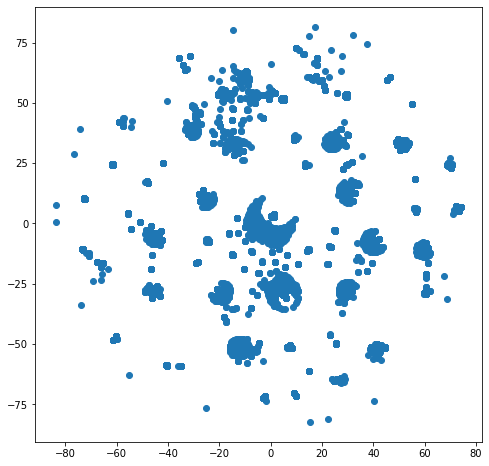

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8)) 
plt.scatter(X_tsne[:, 0].T, X_tsne[:, 1].T)
plt.show()

In [ ]:
# optics聚类
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import OPTICS
from matplotlib import pyplot

# 定义数据集
X = X_tsne
# 定义模型
# model = OPTICS(eps=0.8, min_samples=10)
model = OPTICS(eps=0.8, min_samples=10)
# 模型拟合与聚类预测
yhat = model.fit_predict(X)
# 检索唯一群集
clusters = unique(yhat)
# 为每个群集的样本创建散点图
for cluster in clusters:
    # 获取此群集的示例的行索引
    row_ix = where(yhat == cluster)
    # 创建这些样本的散布
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# 绘制散点图
pyplot.show()

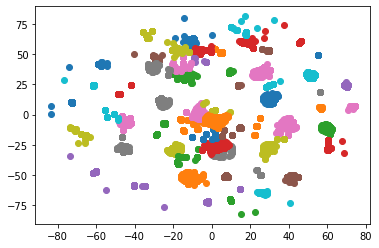

In [5]:
# 亲和力传播聚类
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AffinityPropagation
from matplotlib import pyplot

# 定义数据集
X = X_tsne
# 定义模型
model = AffinityPropagation(damping=0.9)
# 匹配模型
model.fit(X)
# 为每个示例分配一个集群
yhat = model.predict(X)
# 检索唯一群集
clusters = unique(yhat)
# 为每个群集的样本创建散点图
for cluster in clusters:
    # 获取此群集的示例的行索引
    row_ix = where(yhat == cluster)
    # 创建这些样本的散布
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# 绘制散点图
pyplot.show()

In [6]:
import datetime

# 时间比较函数
def compare_time(startTime, endTime):
    d_start = datetime.datetime.strptime(startTime, '%Y-%m-%d %H:%M')
    d_end = datetime.datetime.strptime(endTime, '%Y-%m-%d %H:%M')
    if d_start == d_end:
        return False
    else:
        return True

In [10]:
from geopy.distance import geodesic

# MRO_TS时间到分钟，时间应该一致
# IMSI不一致，确保是两个不同的人
# MRO_TS1 IMSI1  MRO_TS2 IMSI2 LON1 LAT1 LON2 LAT2 category DISTANCE
# ['MRO_TS', 'IMSI', 'OPT_LON', 'OPT_LAT']
content = []
category = 0
for cluster in clusters:
    category += 1
    row_ix = where(yhat == cluster)
    for dim in range(len(row_ix)):
        for i in range(len(row_ix[dim])):
            for j in range(len(row_ix[dim])):
                if row_ix[dim][i] == row_ix[dim][j]: continue
                else:
                    if csv.loc[row_ix[dim][i], 'IMSI'] == csv.loc[row_ix[dim][j], 'IMSI'] or compare_time(csv.loc[row_ix[dim][i], 'MRO_TS'], csv.loc[row_ix[dim][j], 'MRO_TS']): continue
                    else:
                        distance = geodesic((csv.loc[row_ix[dim][i], 'OPT_LAT'], csv.loc[row_ix[dim][i], 'OPT_LON']), (csv.loc[row_ix[dim][j], 'OPT_LAT'], csv.loc[row_ix[dim][j], 'OPT_LON'])).m
                        # 两个人的距离小于50米
                        if  distance < 50:
                            content.append([csv.loc[row_ix[dim][i], 'MRO_TS'], csv.loc[row_ix[dim][i], 'IMSI'], csv.loc[row_ix[dim][j], 'MRO_TS'], csv.loc[row_ix[dim][j], 'IMSI'], csv.loc[row_ix[dim][i], 'OPT_LAT'], csv.loc[row_ix[dim][i], 'OPT_LON'], csv.loc[row_ix[dim][j], 'OPT_LAT'], csv.loc[row_ix[dim][j], 'OPT_LON'], category, distance])
content

[['2022-06-16 11:41',
  460010000000000.0,
  '2022-06-16 11:41',
  460006000000000.0,
  30.324057,
  120.087562,
  30.323907,
  120.087562,
  1,
  16.628688084682814],
 ['2022-06-16 11:41',
  460010000000000.0,
  '2022-06-16 11:41',
  460030000000000.0,
  30.324057,
  120.087562,
  30.324271,
  120.087475,
  1,
  25.15579141653582],
 ['2022-06-16 11:14',
  460007000000000.0,
  '2022-06-16 11:14',
  460025000000000.0,
  30.323714,
  120.087583,
  30.323714,
  120.087583,
  1,
  0.0],
 ['2022-06-16 11:07',
  460030000000000.0,
  '2022-06-16 11:07',
  460024000000000.0,
  30.323596,
  120.087454,
  30.323875,
  120.087626,
  1,
  35.07487391896705],
 ['2022-06-16 11:07',
  460030000000000.0,
  '2022-06-16 11:07',
  460008000000000.0,
  30.323596,
  120.087454,
  30.323521,
  120.087562,
  1,
  13.304461334722232],
 ['2022-06-16 11:07',
  460030000000000.0,
  '2022-06-16 11:07',
  460026000000000.0,
  30.323596,
  120.087454,
  30.323714,
  120.087583,
  1,
  18.02861773035648],
 ['2022-06

In [14]:
content_pandas = pd.DataFrame(content, columns=['MRO_TS1', 'IMSI1',  'MRO_TS2', 'IMSI2', 'LON1', 'LAT1', 'LON2', 'LAT2', 'category', 'DISTANCE'])
content_pandas
# 数据保存
content_pandas.to_csv('../resource/temp.csv')

,MRO_TS1,IMSI1,MRO_TS2,IMSI2,LON1,LAT1,LON2,LAT2,category,DISTANCE
0,2022-06-16 11:41,4.600100e+14,2022-06-16 11:41,4.600060e+14,30.324057,120.087562,30.323907,120.087562,1,16.628688
1,2022-06-16 11:41,4.600100e+14,2022-06-16 11:41,4.600300e+14,30.324057,120.087562,30.324271,120.087475,1,25.155791
2,2022-06-16 11:14,4.600070e+14,2022-06-16 11:14,4.600250e+14,30.323714,120.087583,30.323714,120.087583,1,0.000000
3,2022-06-16 11:07,4.600300e+14,2022-06-16 11:07,4.600240e+14,30.323596,120.087454,30.323875,120.087626,1,35.074874
4,2022-06-16 11:07,4.600300e+14,2022-06-16 11:07,4.600080e+14,30.323596,120.087454,30.323521,120.087562,1,13.304461
...,...,...,...,...,...,...,...,...,...,...
56595,2022-06-16 11:13,4.600070e+14,2022-06-16 11:13,4.600050e+14,30.090276,120.182984,30.090276,120.182984,60,0.000000
56596,2022-06-16 11:02,4.600720e+14,2022-06-16 11:02,4.600290e+14,30.090351,120.182919,30.090308,120.182919,60,4.766721
56597,2022-06-16 11:02,4.600720e+14,2022-06-16 11:02,4.600740e+14,30.090351,120.182919,30.090222,120.182683,60,26.871223
56598,2022-06-16 11:07,4.600040e+14,2022-06-16 11:07,4.600300e+14,30.090201,120.181632,30.090082,120.181331,60,31.874005
